In [ ]:
import pandas as pd
import re
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, normalized_mutual_info_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from hazm import Normalizer as hazm_normalizer, word_tokenize, Stemmer, Lemmatizer, stopwords_list
from sklearn.preprocessing import Normalizer as vec_normalizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, MiniBatchKMeans
import string


In [ ]:
df = pd.read_csv("./golestan.csv")

print(df.shape)
print(df.columns)


(290, 2)
Index(['hekayt', 'bab'], dtype='object')


In [ ]:
df.head()

,hekayt,bab
0,پادشاهی را شنیدم به کُشتنِ اسیری اشارت کرد. بی...,1
1,یکی از ملوکِ خراسان محمودِ سبکتگین را به خواب ...,1
2,ملک‌زاده‌ای را شنیدم که کوتاه بود و حقیر و دیگ...,1
3,طایفهٔ دزدانِ عرب بر سرِ کوهی نشسته بودند و من...,1
4,سرهنگ‌زاده‌ای را بر در سرایِ اُغْلُمُش دیدم که...,1


In [ ]:
df["bab"].value_counts()

bab
8    109
2     48
1     41
3     28
5     21
7     20
4     14
6      9
Name: count, dtype: int64

In [ ]:
normalizer = hazm_normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()
base_stopwords = set(stopwords_list())

In [ ]:
base_stopwords = set(stopwords_list())

In [ ]:
extra_stopwords = {
    "است", "هست", "بود", "شد", "باشد",
    "می", "هم", "را", "که", "با", "از", "برای",
    "ای", "این", "آن", "من", "تو", "ما", "شما", "او",
    "پادشاه", "ملک", "شاه", "وزیر", "بنده", "مرد", "یکی", "شخصی",
    "گفت", "گوید", "پرسید", "شنید",
    "چون", "کرد", "کند", "کردند", "بودند", "دید",
    "هر", "بر", "در", "چو", "اگر", "تا", "پس", "اما", "نیز",
    "نصیحت", "حکایت", "داستان", "خلق", "گفتند",
    "بدان", "چنان", "همچنان", "همیشه"
}


additional_stopwords = set()

for i in extra_stopwords:
    print(f'if {i} is in stopwords list? {i in base_stopwords}')
    if i not in base_stopwords: 
        additional_stopwords.add(i)

additional_stopwords

if اگر is in stopwords list? True
if تو is in stopwords list? True
if خلق is in stopwords list? False
if او is in stopwords list? True
if کرد is in stopwords list? True
if با is in stopwords list? True
if شخصی is in stopwords list? True
if در is in stopwords list? True
if بودند is in stopwords list? True
if همچنان is in stopwords list? True
if بدان is in stopwords list? False
if گفت is in stopwords list? True
if گوید is in stopwords list? False
if ما is in stopwords list? True
if نصیحت is in stopwords list? False
if کردند is in stopwords list? True
if گفتند is in stopwords list? False
if تا is in stopwords list? True
if است is in stopwords list? True
if شد is in stopwords list? True
if من is in stopwords list? True
if ای is in stopwords list? False
if هست is in stopwords list? False
if پس is in stopwords list? True
if باشد is in stopwords list? True
if هم is in stopwords list? True
if بود is in stopwords list? True
if اما is in stopwords list? True
if نیز is in stopwords list? True
if 

{'ای',
 'بدان',
 'بنده',
 'حکایت',
 'خلق',
 'داستان',
 'دید',
 'شاه',
 'شنید',
 'مرد',
 'ملک',
 'نصیحت',
 'هست',
 'وزیر',
 'پادشاه',
 'پرسید',
 'چنان',
 'چو',
 'گفتند',
 'گوید'}

In [ ]:
stopwords = base_stopwords.union(additional_stopwords)

print(len(base_stopwords))
print(len(stopwords))

389
409


In [ ]:

# Persian punctuation
PERSIAN_PUNCT = {"،", "؛", ":", "؟", "«", "»", "…", "ـ"}

def preprocess_hekayat(text):
    text = str(text)
    text = text.replace("ي", "ی").replace("ك", "ک")
    text = text.replace("\u200c", " ")
    text = normalizer.normalize(text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if re.search(r"[آ-یءئ]", t)]
    punct = set(string.punctuation) | PERSIAN_PUNCT
    tokens = [t for t in tokens if t not in punct]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not t.isnumeric()]
    tokens = [t for t in tokens if len(t) > 1]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [stemmer.stem(t) for t in tokens]
    tokens = [t.strip() for t in tokens if t.strip()]
    return " ".join(tokens)


In [ ]:
df["clean_hekayt"] = df["hekayt"].apply(preprocess_hekayat)

In [ ]:
df.to_csv("golestan_clean.csv", index=False)
df[["hekayt", "clean_hekayt"]].head()

,hekayt,clean_hekayt
0,پادشاهی را شنیدم به کُشتنِ اسیری اشارت کرد. بی...,پادشاه شنید#شنو کشتن اسیر اشار بیچاره حال نومی...
1,یکی از ملوکِ خراسان محمودِ سبکتگین را به خواب ...,ملوک خراس محمود سبکتگین خواب جمله ریخت#ریز خاک...
2,ملک‌زاده‌ای را شنیدم که کوتاه بود و حقیر و دیگ...,ملک‌زاده شنید#شنو کوتاه حقیر برادر بلند بار پد...
3,طایفهٔ دزدانِ عرب بر سرِ کوهی نشسته بودند و من...,طایفه دزد عرب سر کوه شست#شو منفذ کارو بسته رع ...
4,سرهنگ‌زاده‌ای را بر در سرایِ اُغْلُمُش دیدم که...,سرهنگ زاد#زا سرود#سرا اغلم دید#بین عقل کیاس فه...


In [ ]:

bow_vectorizer = CountVectorizer(
    max_features=8000,
    ngram_range=(1, 1),   
    binary=False          
)

x_bow = bow_vectorizer.fit_transform(df["clean_hekayt"])

svd = TruncatedSVD(n_components=100, random_state=42)
x_bow_reduced = svd.fit_transform(x_bow)
normalizer_vec = vec_normalizer()
X_final = normalizer_vec.fit_transform(x_bow_reduced)

In [ ]:
bow_feature_names = bow_vectorizer.get_feature_names_out()
bow_feature_names[:30]  

array(['آب', 'آباد', 'آبرو', 'آبگینه', 'آت', 'آتش', 'آثار', 'آجل', 'آحاد',
       'آخر', 'آد', 'آداب', 'آدم', 'آدمیس', 'آدینه', 'آذارند', 'آر',
       'آرا', 'آراستن', 'آراسته', 'آرد', 'آرزو', 'آرمیده', 'آز', 'آزاد',
       'آزادگ', 'آزار', 'آزر', 'آزردن', 'آزرده'], dtype=object)

In [ ]:
k = 5
kmeans = MiniBatchKMeans(
    n_clusters=k,
    init="k-means++",
    n_init=20,
    max_iter=300,
    batch_size=256,
    random_state=42
)
kmeans.fit(X_final)
labels_final = kmeans.fit_predict(X_final)


In [ ]:
# cluster sizes
unique, counts = np.unique(labels_final, return_counts=True)
for lbl, cnt in zip(unique, counts):
    print(f"Cluster {lbl}: {cnt} hekayat")

Cluster 0: 21 hekayat
Cluster 1: 90 hekayat
Cluster 2: 23 hekayat
Cluster 3: 96 hekayat
Cluster 4: 60 hekayat


In [ ]:
threshold = 0.15 * np.mean(counts)
print("Are clusters balanced?", np.std(counts) < threshold)


Are clusters balanced? False


In [ ]:
sil = silhouette_score(X_final, labels_final)
nmi = normalized_mutual_info_score(df["bab"], labels_final)
k = 5

df_clusters = pd.DataFrame({
    "cluster": labels_final,
    "bab": df["bab"]
})
cluster_groups = df_clusters.groupby("cluster")["bab"].value_counts()
print(cluster_groups)

nmi = normalized_mutual_info_score(df["bab"], labels_final)
print("NMI:", nmi)


print("silhouette:", sil)


cluster  bab
0        8      11
         4       3
         2       2
         6       2
         1       1
         5       1
         7       1
1        2      27
         1      16
         3      12
         5      10
         8      10
         4       7
         7       6
         6       2
2        8      13
         2       5
         1       2
         7       2
         3       1
3        8      53
         1      12
         3       9
         2       7
         5       6
         7       5
         4       3
         6       1
4        8      22
         1      10
         2       7
         3       6
         7       6
         5       4
         6       4
         4       1
Name: count, dtype: int64
NMI: 0.08646129961135006
silhouette: 0.03341221474043767


In [ ]:
centers = kmeans.cluster_centers_
feature_names = bow_vectorizer.get_feature_names_out()

for idx, center in enumerate(centers):
    print(f"\nCluster {idx} top terms:")
    top_indices = center.argsort()[::-1][:10]
    for i in top_indices:
        print(f"  {feature_names[i]}  ({center[i]:.3f})")


Cluster 0 top terms:
  آب  (0.286)
  آشفته  (0.148)
  آذارند  (0.098)
  آزما  (0.096)
  آش  (0.096)
  آل  (0.092)
  آزار  (0.084)
  آمد  (0.083)
  آراسته  (0.070)
  آدمیس  (0.069)

Cluster 1 top terms:
  آب  (0.436)
  آبرو  (0.136)
  آبگینه  (0.074)
  آحاد  (0.065)
  آد  (0.045)
  آثار  (0.038)
  آزرده  (0.028)
  آشامید  (0.026)
  آزاد  (0.021)
  آشنا  (0.021)

Cluster 2 top terms:
  آب  (0.293)
  آدینه  (0.135)
  آزر  (0.116)
  آتش  (0.087)
  آسوده  (0.084)
  آراستن  (0.081)
  آشامید  (0.070)
  آذارند  (0.070)
  آدمیس  (0.063)
  آمد  (0.055)

Cluster 3 top terms:
  آب  (0.251)
  آشا  (0.059)
  آسیا  (0.047)
  آشکارا  (0.039)
  آد  (0.037)
  آسان  (0.034)
  آشنا  (0.034)
  آویخت  (0.033)
  آز  (0.030)
  أذ  (0.029)

Cluster 4 top terms:
  آب  (0.340)
  آتش  (0.183)
  آجل  (0.094)
  آبرو  (0.088)
  آراستن  (0.055)
  آدم  (0.053)
  آخر  (0.044)
  آداب  (0.042)
  آرد  (0.038)
  آزردن  (0.038)


K= 2 → Inertia=245.65, Sil=0.0236, NMI=0.0155, Sizes=[C0=192, C1=98], BalanceRatio=1.96, 
K= 3 → Inertia=238.67, Sil=0.0281, NMI=0.0300, Sizes=[C0=76, C1=70, C2=144], BalanceRatio=2.06, 
K= 4 → Inertia=233.30, Sil=0.0305, NMI=0.0509, Sizes=[C0=94, C1=46, C2=127, C3=23], BalanceRatio=5.52, 
K= 5 → Inertia=227.06, Sil=0.0351, NMI=0.0748, Sizes=[C0=97, C1=43, C2=64, C3=21, C4=65], BalanceRatio=4.62, 
K= 6 → Inertia=221.48, Sil=0.0392, NMI=0.0767, Sizes=[C0=49, C1=36, C2=87, C3=20, C4=42, C5=56], BalanceRatio=4.35, 
K= 7 → Inertia=219.32, Sil=0.0404, NMI=0.0762, Sizes=[C0=48, C1=35, C2=69, C3=20, C4=42, C5=58, C6=18], BalanceRatio=3.83, 
K= 8 → Inertia=217.41, Sil=0.0304, NMI=0.0915, Sizes=[C0=31, C1=37, C2=18, C3=37, C4=41, C5=60, C6=31, C7=35], BalanceRatio=3.33, 
K= 9 → Inertia=214.75, Sil=0.0311, NMI=0.1026, Sizes=[C0=21, C1=35, C2=18, C3=27, C4=49, C5=65, C6=21, C7=34, C8=20], BalanceRatio=3.61, 
K=10 → Inertia=212.68, Sil=0.0283, NMI=0.1219, Sizes=[C0=18, C1=32, C2=18, C3=27, C4=44, 

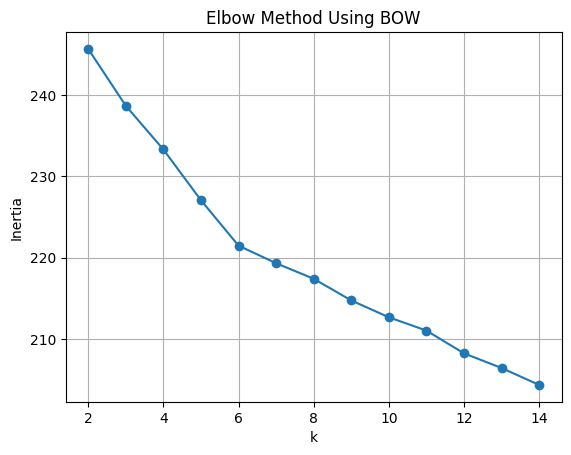

In [ ]:

k_values = range(2, 15)
inertias = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_final)

    inertias.append(km.inertia_)

    labels = km.labels_
    inertia = km.inertia_
    sil = silhouette_score(X_final, labels)
    nmi = normalized_mutual_info_score(df["bab"], labels)

    unique, counts = np.unique(labels, return_counts=True)

    sizes_str = ", ".join(
        f"C{int(c)}={int(cnt)}" for c, cnt in zip(unique, counts)
    )

    sizes = counts.tolist()
    sizes_str = ", ".join([f"C{i}={c}" for i, c in enumerate(sizes)])

    balance_ratio = max(counts) / min(counts)
    balanced = balance_ratio <= 3.0
    print(
    f"K={k:2d} → Inertia={inertia:.2f}, "
    f"Sil={sil:.4f}, NMI={nmi:.4f}, "
    f"Sizes=[{sizes_str}], "
    f"BalanceRatio={balance_ratio:.2f}, "
    f""
)


# elbow plot
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method Using BOW")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


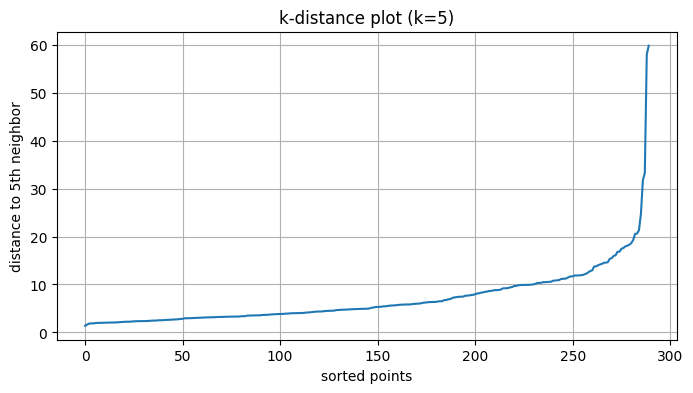

k-distance percentiles: [ 4.95316333  9.25809955 13.01010188 17.17785323 31.8653535 ]


In [ ]:
min_samples = 5   

nn = NearestNeighbors(n_neighbors=min_samples).fit(x_bow_reduced)
distances, _ = nn.kneighbors(x_bow_reduced)

kdist = np.sort(distances[:, -1])
plt.figure(figsize=(8,4))
plt.plot(kdist)
plt.title(f"k-distance plot (k={min_samples})")
plt.xlabel("sorted points")
plt.ylabel(f"distance to {min_samples}th neighbor")
plt.grid(True)
plt.show()

print("k-distance percentiles:", np.percentile(kdist, [50, 75, 90, 95, 99]))


In [ ]:

eps = float(np.percentile(kdist, 95)) 
db = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")

labels = db.fit_predict(X_final)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = int(np.sum(labels == -1))

print("\nDBSCAN eps =", eps, "min_samples =", min_samples)
print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)

unique, counts = np.unique(labels, return_counts=True)
for u, c in zip(unique, counts):
    name = "Noise" if u == -1 else f"Cluster {int(u)}"
    print(f"{name}: {int(c)} hekayat")

cluster_counts = [int(c) for u, c in zip(unique, counts) if u != -1]
if len(cluster_counts) >= 2:
    threshold = 0.15 * np.mean(cluster_counts)
    print("Are clusters balanced?", np.std(cluster_counts) < threshold)
else:
    print("Are clusters balanced? False (only 0 or 1 real cluster)")
    




DBSCAN eps = 17.17785322998315 min_samples = 5
Number of clusters: 1
Number of noise points: 0
Cluster 0: 290 hekayat
Are clusters balanced? False (only 0 or 1 real cluster)


In [ ]:
feature_names = np.array(bow_vectorizer.get_feature_names_out())

if n_clusters > 0:
    print("\nTop 5 words per DBSCAN cluster:")

    for cl in sorted(set(labels)):
        if cl == -1:
            continue

        idx = np.where(labels == cl)[0]
        cluster_sum = np.asarray(x_bow[idx].sum(axis=0)).ravel()

        top_ids = cluster_sum.argsort()[::-1][:5]
        top_words = feature_names[top_ids]

        print(f"Cluster {cl}: {', '.join(top_words)}")
else:
    print("\nDBSCAN produced no clusters, so top-words per cluster cannot be computed.")



Top 5 words per DBSCAN cluster:
Cluster 0: گو, گفت, کن, دس, کرد


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

min_samples = 10
for eps in np.linspace(0.2, 3.0, 15):   # adjust range if needed
    labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(x_bow_reduced)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = np.sum(labels == -1)
    print(f"eps={eps:.2f} -> clusters={n_clusters}, noise={n_noise}")


eps=0.20 -> clusters=0, noise=290
eps=0.40 -> clusters=0, noise=290
eps=0.60 -> clusters=0, noise=290
eps=0.80 -> clusters=0, noise=290
eps=1.00 -> clusters=0, noise=290
eps=1.20 -> clusters=0, noise=290
eps=1.40 -> clusters=0, noise=290
eps=1.60 -> clusters=0, noise=290
eps=1.80 -> clusters=1, noise=277
eps=2.00 -> clusters=1, noise=269
eps=2.20 -> clusters=1, noise=259
eps=2.40 -> clusters=1, noise=250
eps=2.60 -> clusters=1, noise=242
eps=2.80 -> clusters=1, noise=232
eps=3.00 -> clusters=1, noise=220


In [ ]:
for ms in [5, 8, 10]:
    labels = DBSCAN(eps=1.2, min_samples=ms).fit_predict(x_bow_reduced)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = np.sum(labels == -1)
    print(f"min_samples={ms} -> clusters={n_clusters}, noise={n_noise}")


min_samples=5 -> clusters=0, noise=290
min_samples=8 -> clusters=0, noise=290
min_samples=10 -> clusters=0, noise=290
